In [116]:
import pandas as pd
import numpy as np
import spacy
from textblob import TextBlob

In [117]:
df = pd.read_csv("AAL_bid.csv", encoding='iso-8859-1')

In [133]:
df=df.iloc[:,[0,1,2]]
df

,Title,Date,Sentence
0,BHPs pursuit of Anglo American has a major ob...,28/04/2024,The De Beers owner is a longstanding jewel in ...
1,Anglo American rejects £31bn takeover offer fr...,26/04/2024,All-share proposal had potential to be one of ...
2,Who are Anglo Americans possible suitors?,29/04/2024,BHPs unsolicited £31bn takeover approach for ...
3,BHPs bid for Anglo American chips away furthe...,29/04/2024,Companys exit would deal another blow to City...
4,"BHP Mega Bid and $10,000 Copper Expose Mining...",29/04/2024,Spending on new copper mines has declined in r...
5,BHPs Anglo buyout makes business sense if the...,29/04/2024,Winning over various regulators across several...
6,Anglo American rejects £31bn mega-deal with rival,26/04/2024,Anglo American has rejected a £31.1bn takeover...
7,BHP makes $39 billion bid for Anglo American i...,25/04/2024,Mining giant BHP Group on Thursday said it had...
8,Mining giant BHP's huge takeover offer for Ang...,30/04/2024,When a huge merger/acquisition deal manifests ...
9,Copper smelters in leading buyer China wary of...,30/04/2024,"Chinese smelters, the world's biggest buyers o..."


In [119]:
# import string
# from nltk.corpus import stopwords

In [120]:
# def text_cleaning(text):
#     stop_words = [stopwords.words("english")]
#     no_punct =[word for word in text if word not in string.punctuation]
#     no_punct_str = " ".join(no_punct)
    
#     return " ".join([word for word in no_punct_str if word.lower() not in stop_words])

In [121]:
#df["Clean"] = df["Sentence"].apply(text_cleaning)
# df["Clean"] = df["Sentence"].apply(text_cleaning)

In [134]:
df.head()

,Title,Date,Sentence
0,BHPs pursuit of Anglo American has a major ob...,28/04/2024,The De Beers owner is a longstanding jewel in ...
1,Anglo American rejects £31bn takeover offer fr...,26/04/2024,All-share proposal had potential to be one of ...
2,Who are Anglo Americans possible suitors?,29/04/2024,BHPs unsolicited £31bn takeover approach for ...
3,BHPs bid for Anglo American chips away furthe...,29/04/2024,Companys exit would deal another blow to City...
4,"BHP Mega Bid and $10,000 Copper Expose Mining...",29/04/2024,Spending on new copper mines has declined in r...


In [135]:
#df=df['Title']

In [124]:
nlp = spacy.load('en_core_web_sm')

In [138]:

data = pd.DataFrame(df['Sentence'])
data.dropna(inplace=True)
data.columns = ["Sentence"] 
data["Cumulative Polarity"] = None
data.head()

,Sentence,Cumulative Polarity
0,The De Beers owner is a longstanding jewel in ...,None
1,All-share proposal had potential to be one of ...,None
2,BHPs unsolicited £31bn takeover approach for ...,None
3,Companys exit would deal another blow to City...,None
4,Spending on new copper mines has declined in r...,None


In [139]:
def cumulative_polarity(sentence: str) -> float:
    """
    Compute cumulative polarity for all words in a sentence.
    """
    # Argument validation
    if isinstance (sentence, str) is False:
        raise TypeError("The argument `sentence` must be of type string.")
    # Compute the polarity of every word in a sentence and add up all polarities
    cumulative_polarity = 0.0
    words = sentence.lower().split()
    for word in words:
        if word in nlp.Defaults.stop_words:
            continue
        blob = TextBlob(word)
        cumulative_polarity += blob.sentiment.polarity
    return cumulative_polarity



def main(df: pd.DataFrame) -> None: 
    # Arguments validation
    if isinstance(df,pd.DataFrame) is False:
        raise TypeError("The argument df must be of pandas.DataFrame type.")
    # Compute polarity for every sentence
    for i in range(len(df)):
        sentence = df.iloc[i, 0]
        df.iloc[i, 1] = cumulative_polarity(sentence)

        

In [140]:
main(df=data)

In [141]:
polarity_score = data['Cumulative Polarity'].mean()
if polarity_score > 0:
    sentiment = 'positive'
elif polarity_score < 0:
    sentiment = 'negative'
else:
    sentiment = 'neutral'

print(f"Reviews' Mean polarity score: {polarity_score}\nSentiment: {sentiment}")


Reviews' Mean polarity score: 0.20517045454545457
Sentiment: positive


In [142]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from collections import defaultdict

In [143]:
# Initialize dictionaries to hold positive and negative words
positive_words = defaultdict(int)
negative_words = defaultdict(int)

In [144]:
def words_sent(df: pd.DataFrame) -> None:
    if isinstance(df,pd.DataFrame) is False:
        raise TypeError
    for i in range(len(df)):
        sentence = df.iloc[i,0]
        
           # for words in sentences:
        words = sentence.split()

        for word in words:
            blob = TextBlob(word)
            polarity = blob.sentiment.polarity

            if polarity > 0:
                positive_words[word.lower()] += 1
            elif polarity < 0:
                negative_words[word.lower()] += 1

In [145]:
words_sent(data)
pos_wordcloud = WordCloud(width=400, height=200, background_color ='white').generate_from_frequencies(positive_words)
neg_wordcloud = WordCloud(width=400, height=200, background_color ='white').generate_from_frequencies(negative_words)

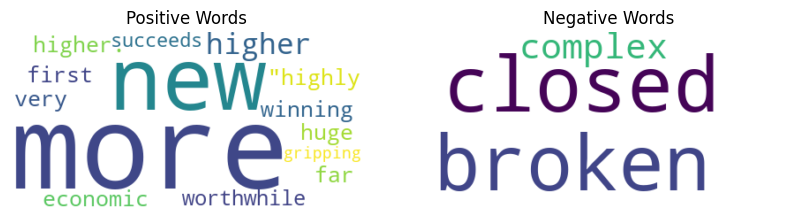

In [146]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(pos_wordcloud, interpolation='bilinear')
ax[0].set_title('Positive Words')
ax[0].axis('off')

ax[1].imshow(neg_wordcloud, interpolation='bilinear')
ax[1].set_title('Negative Words')
ax[1].axis('off')

plt.show()